In [1]:
!pip install opencv-python-headless matplotlib numpy


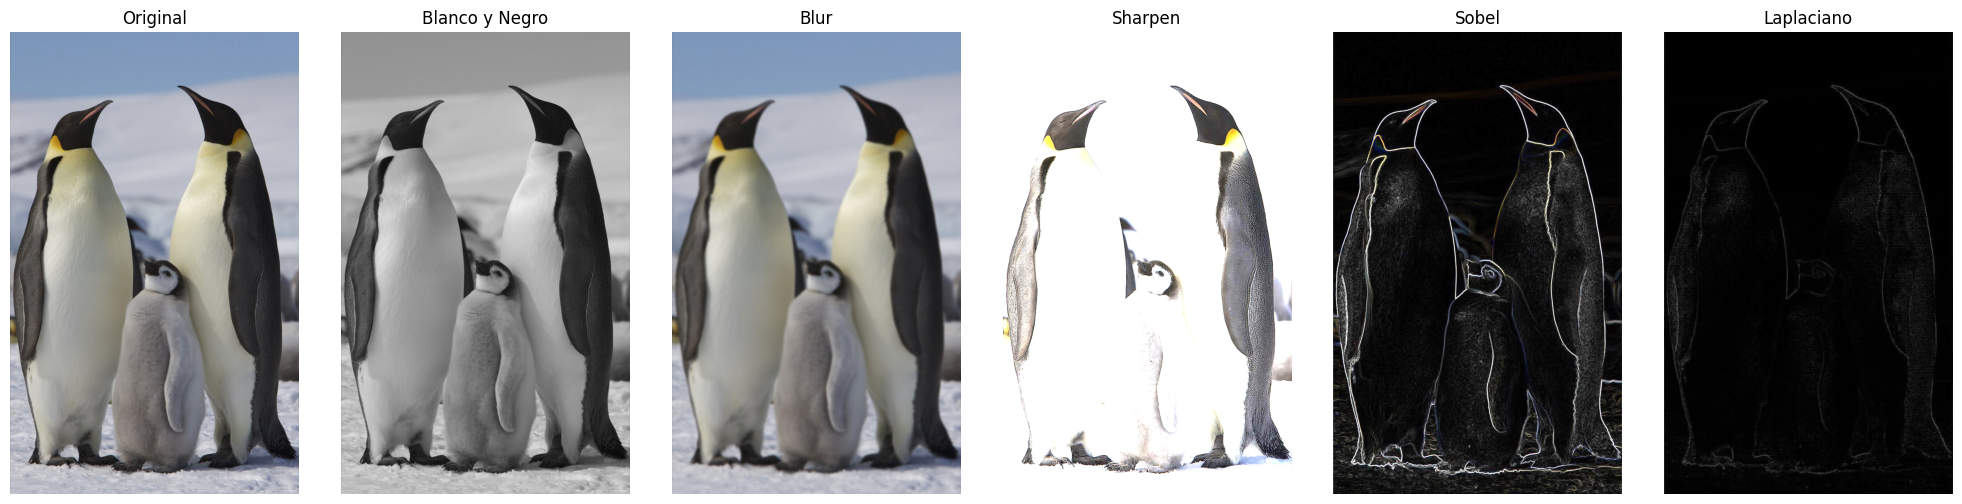

In [18]:
# Importación de librerías necesarias
import cv2  # OpenCV para procesamiento de imágenes
import numpy as np  # Numpy para operaciones con matrices
import matplotlib.pyplot as plt  # Matplotlib para visualización de imágenes
from PIL import Image, ImageDraw, ImageFont  # PIL para manejo de imágenes y creación de GIFs

# --- Cargar imagen y preparar variaciones ---

# Cargar imagen en formato BGR (formato predeterminado de OpenCV)
img_bgr = cv2.imread('imagen.jpg')

# Convertir la imagen de BGR a RGB para visualización y procesamiento correcto
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Crear versión en blanco y negro (escala de grises)
img_bw = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# Convertir la imagen en escala de grises de nuevo a RGB para mantener consistencia de canales
img_bw_rgb = cv2.cvtColor(img_bw, cv2.COLOR_GRAY2RGB)

# Aplicar desenfoque gaussiano (blur) a la imagen
img_blur = cv2.GaussianBlur(img_rgb, (15, 15), 0)

# Aplicar filtro de sharpening (enfoque fuerte) con un kernel personalizado
kernel_sharp = np.array([[0, -2, 0],
                         [-2, 11, -2],
                         [0, -2, 0]])
img_sharp = cv2.filter2D(img_rgb, -1, kernel_sharp)

# Aplicar filtro Sobel por canal (detecta bordes en direcciones x e y)
sobel_channels = []
for ch in cv2.split(img_rgb):  # Separar la imagen en canales R, G y B
    sobelx = cv2.Sobel(ch, cv2.CV_64F, 1, 0, ksize=3)  # Derivada en x
    sobely = cv2.Sobel(ch, cv2.CV_64F, 0, 1, ksize=3)  # Derivada en y
    sobel = cv2.magnitude(sobelx, sobely)  # Magnitud del gradiente
    sobel = np.uint8(np.clip(sobel, 0, 255))  # Convertir a tipo de imagen válido
    sobel_channels.append(sobel)
img_sobel = cv2.merge(sobel_channels)  # Combinar canales procesados

# Aplicar filtro Laplaciano por canal (detecta bordes basados en segundas derivadas)
lap_channels = []
for ch in cv2.split(img_rgb):
    lap = cv2.Laplacian(ch, cv2.CV_64F)  # Filtro laplaciano
    lap = np.uint8(np.clip(np.abs(lap), 0, 255))  # Escalar y convertir a entero
    lap_channels.append(lap)
img_lap = cv2.merge(lap_channels)

# --- Mostrar resultados en una malla ---

# Lista de imágenes y títulos correspondientes
imagenes = [img_rgb, img_bw_rgb, img_blur, img_sharp, img_sobel, img_lap]
titulos = ['Original', 'Blanco y Negro', 'Blur', 'Sharpen', 'Sobel', 'Laplaciano']

# Crear una figura con 6 subgráficas en una fila
plt.figure(figsize=(20, 5))
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(imagenes[i])
    plt.title(titulos[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# --- Crear un GIF animado con texto en cada fotograma ---

gif_frames = []
for img_np, title in zip(imagenes, titulos):
    # Convertir la imagen de NumPy a formato PIL
    img_pil = Image.fromarray(img_np)
    draw = ImageDraw.Draw(img_pil)

    # Intentar cargar fuente 'arial', si falla usar fuente predeterminada
    try:
        font = ImageFont.truetype("arial.ttf", 256)
    except:
        font = ImageFont.load_default()

    # Dibujar el título de la imagen sobre la imagen
    draw.text((10, 10), title, fill=(255, 255, 255), font=font)
    gif_frames.append(img_pil)

# Guardar las imágenes como un GIF animado
gif_frames[0].save("filtros_animados.gif", save_all=True,
                   append_images=gif_frames[1:], duration=800, loop=0)
